In [28]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Step 2: Load dataset
df = pd.read_csv("/content/movie_dataset.zip")

In [30]:
# Step 3: Drop unwanted columns
df = df.drop(columns=["rating","runtime", "company", "gross", "budget", "country", "votes"], errors="ignore")
df.columns = df.columns.str.capitalize()

In [31]:
# Step 4: Rename 'score' -> 'rating'
if "Score" in df.columns:
  df = df.rename(columns={"Score": "Rating"})
df.head()

,Name,Genre,Year,Released,Rating,Director,Writer,Star
0,The Shining,Drama,1980,"June 13, 1980 (United States)",8.4,Stanley Kubrick,Stephen King,Jack Nicholson
1,The Blue Lagoon,Adventure,1980,"July 2, 1980 (United States)",5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,"June 20, 1980 (United States)",8.7,Irvin Kershner,Leigh Brackett,Mark Hamill
3,Airplane!,Comedy,1980,"July 2, 1980 (United States)",7.7,Jim Abrahams,Jim Abrahams,Robert Hays
4,Caddyshack,Comedy,1980,"July 25, 1980 (United States)",7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase


In [32]:
# Step 5: Check dataset info
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Dataset Shape: (7668, 8)

Missing Values:
 Name        0
Genre       0
Year        0
Released    2
Rating      3
Director    0
Writer      3
Star        1
dtype: int64

Data Types:
 Name         object
Genre        object
Year          int64
Released     object
Rating      float64
Director     object
Writer       object
Star         object
dtype: object


In [33]:
# Step 6: Handle missing values (if any)
df = df.dropna()   # simple method (you can also use fillna if needed)

In [34]:
# Step 7: Basic statistics
print("\nSummary Statistics:\n", df.describe(include="all"))


Summary Statistics:
                  Name   Genre         Year                      Released  \
count            7659    7659  7659.000000                          7659   
unique           7503      18          NaN                          3408   
top     Nobody's Fool  Comedy          NaN  May 17, 2019 (United States)   
freq                3    2244          NaN                             9   
mean              NaN     NaN  2000.395091                           NaN   
std               NaN     NaN    11.147041                           NaN   
min               NaN     NaN  1980.000000                           NaN   
25%               NaN     NaN  1991.000000                           NaN   
50%               NaN     NaN  2000.000000                           NaN   
75%               NaN     NaN  2010.000000                           NaN   
max               NaN     NaN  2020.000000                           NaN   

             Rating     Director       Writer          Star  
cou

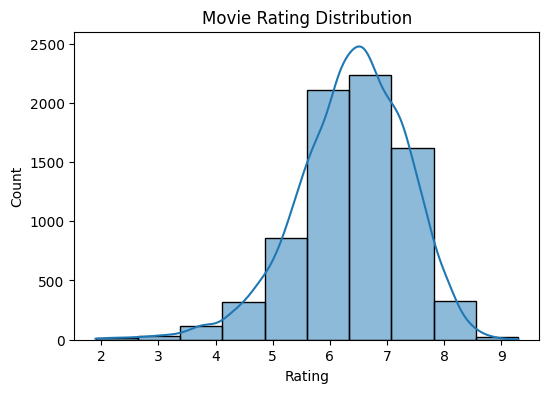

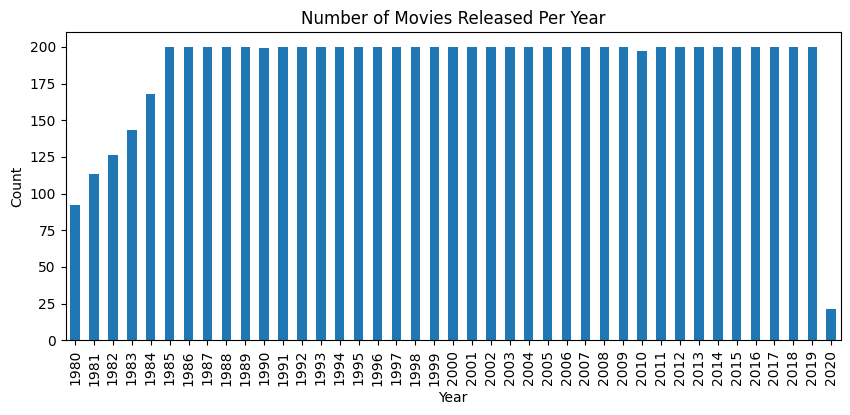

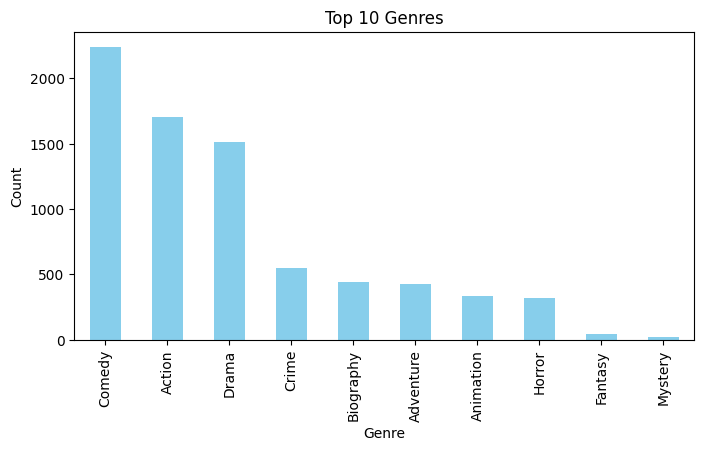

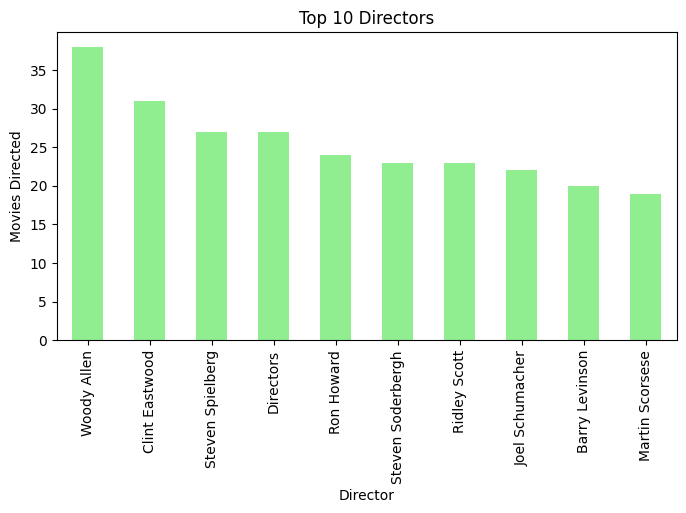

In [35]:
# Step 8: Data Exploration with Visualizations

# 8.1 Rating distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Rating"], bins=10, kde=True)
plt.title("Movie Rating Distribution")
plt.show()

# 8.2 Movies per year
plt.figure(figsize=(10,4))
df["Year"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 8.3 Top 10 genres
plt.figure(figsize=(8,4))
df["Genre"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

# 8.4 Top 10 directors
plt.figure(figsize=(8,4))
df["Director"].value_counts().head(10).plot(kind="bar", color="lightgreen")
plt.title("Top 10 Directors")
plt.xlabel("Director")
plt.ylabel("Movies Directed")
plt.show()

In [36]:
# Step 9: Save cleaned dataset for model.ipynb
df.to_csv("movies_cleaned.csv", index=False)
print("\n Cleaned dataset saved as 'movies_cleaned.csv'")


 Cleaned dataset saved as 'movies_cleaned.csv'
